### Melanoma Skin Detection Assignment using CNN by Vimala Subramanian
Due Date - 18 Sep 2024

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# ## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

# ##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images

data_dir_train = pathlib.Path(r"C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train")

data_dir_test = pathlib.Path(r"C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Test")

In [4]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
print("Train Directories: " ,dir_train)
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
print("Test Directories: " , dir_test)

Train Directories:  ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Test Directories:  ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader: - batch size =32, img_height and img_width

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size

)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
num_classes = len(val_ds.class_names)
num_classes

9

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

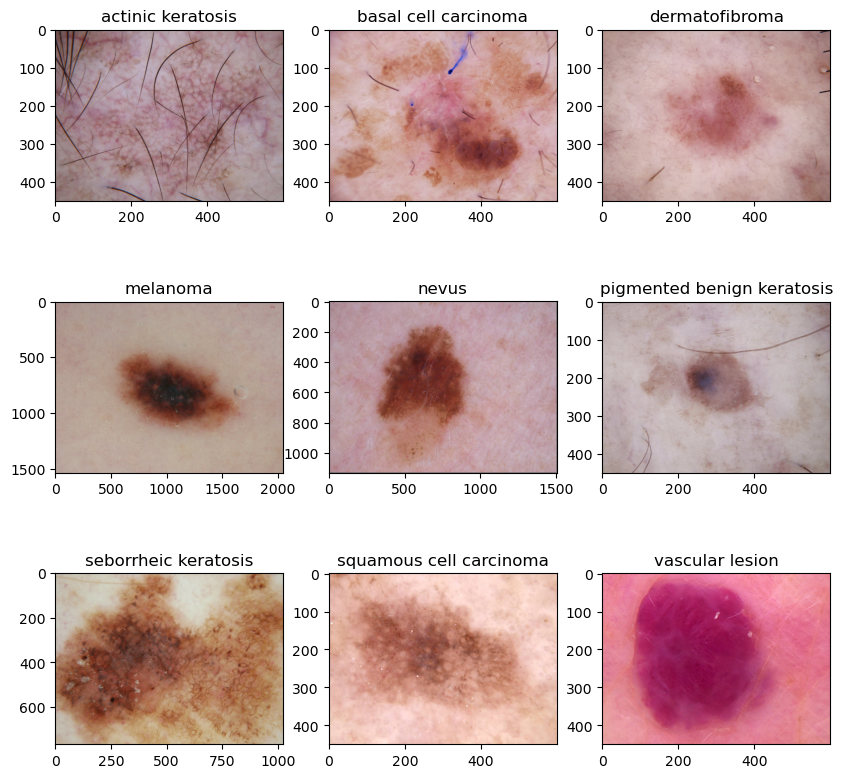

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

### Model 1 - M1 Base Model

 1. rescale images to normalize pixel values between (0,1).
 2. Train the model for ~20 epochs

Please note as I am using the recent version of Tensorflow/Keras, the experimental namespace has been deprecated for some layers, including Rescaling. So I have used keras.layers.Rescaling directly instead of layers.experimental.preprocessing.Rescaling.

In [18]:
# num_classes = 9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)) ]) 
    
# Convolutional Layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (9 classes)
model.add(layers.Dense(num_classes, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,633 (6.34 MB)

 Trainable params: 1,662,633 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.2099 - loss: 2.0428 - val_accuracy: 0.3423 - val_loss: 1.8238
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.3728 - loss: 1.7263 - val_accuracy: 0.4474 - val_loss: 1.5909
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.4330 - loss: 1.5990 - val_accuracy: 0.4765 - val_loss: 1.5391
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.5132 - loss: 1.4548 - val_accuracy: 0.4855 - val_loss: 1.5098
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.5370 - loss: 1.3391 - val_accuracy: 0.5503 - val_loss: 1.3331
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.5674 - loss: 1.2281 - val_accuracy: 0.5593 - val_loss: 1.3684
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.5834 - loss: 1.1896 - val_accuracy: 0.5727 - val_loss: 1.3866
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.6253 - loss: 1.0482 - val_accuracy: 0

### Visualizing training results

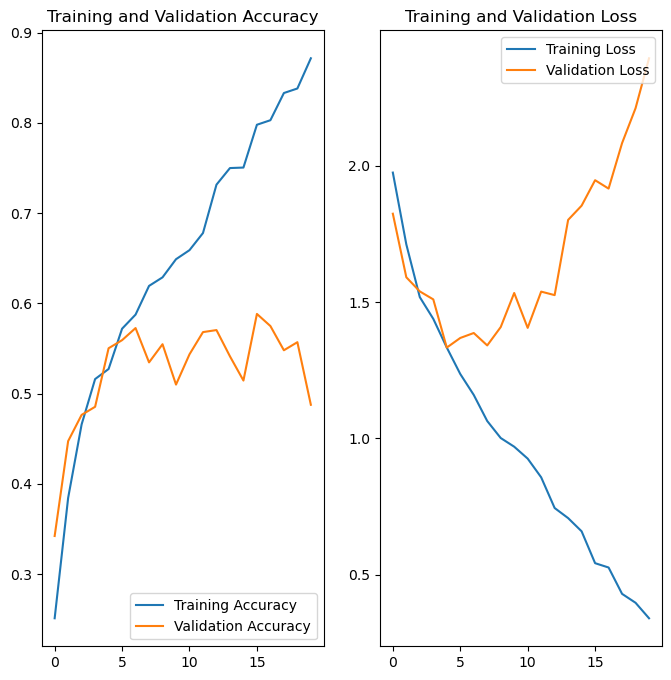

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Observations on the base Model 1.

accuracy: 0.8700 - loss: 0.3415 - val_accuracy: 0.4877 - val_loss: 2.3936
1. The **training accuracy is 87%** and **Validation accuracy is 48.77%**.
2. The training and Validation Loss are  .3415 and 2.3936 which is a huge gap.
3. The training loss is decreasing while the validation_loss is increasing

Possible Reasons and Solutions
1. Overfitting: There is huge difference and clearly calls out on overfitting. The model has memorized the training data rather than generalizing well.

Possible Solutions:

a.Dropouts or Regularization: Add techniques like L2 regularization or dropout to prevent overfitting.

b.Reduce Model Complexity: Use a simpler model (reduce the number of parameters)

c.Data Augmentation: Introduce more training data or artificially augment your current data set.

2. Training Data Quality: A significant gap may also indicate that the training data is not representative of your validation data.

Possible Solution:

a. Ensure the training and validation sets are representative of the same distribution and have sufficient data.

3. Hyperparameter Tuning: The model might benefit from tuning parameters such as learning rate, batch size, or the number of layers.

Possible Solution:

a. Experiment with different hyperparameters using techniques like grid search or random search.

b. Cross-Validation:Try using cross-validation, it can provide a better understanding of how well the model is generalizing to unseen data.

Let us try and use some of these solution to achieve a better model


### Model 2 - with Data Augmentation


In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
data_augument = keras.Sequential([
                             keras.layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             keras.layers.RandomRotation(0.2, fill_mode='reflect'),
                             keras.layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

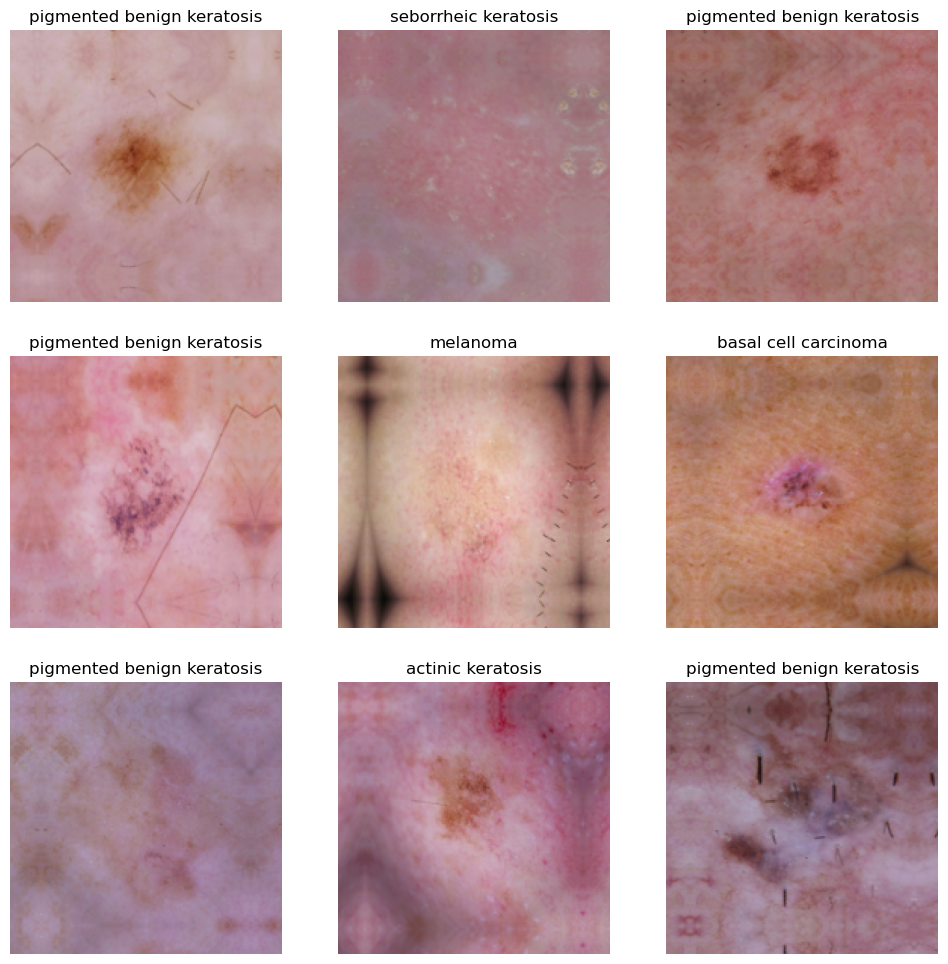

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### M2 Model Building the model M2 with data Augmentation and dropout

In [25]:
# Building the model M2 with data Augmentation and dropout,

# num_classes = 9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)) ]) 
    
# Convolutional Layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (9 classes)
model.add(layers.Dense(num_classes, activation='softmax'))


In [26]:
# model compilation
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,633 (6.34 MB)

 Trainable params: 1,662,633 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#train the model : run the model on train & validation set
epochs = 20
history = model.fit(train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.2375 - loss: 2.0749 - val_accuracy: 0.2394 - val_loss: 2.1310
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.3668 - loss: 1.7476 - val_accuracy: 0.4519 - val_loss: 1.5218
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.4604 - loss: 1.5225 - val_accuracy: 0.5078 - val_loss: 1.4880
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5260 - loss: 1.3946 - val_accuracy: 0.5123 - val_loss: 1.3781
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.5768 - loss: 1.2501 - val_accuracy: 0.5682 - val_loss: 1.3667
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.5700 - loss: 1.1898 - val_accuracy: 0.5369 - val_loss: 1.4278
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.5927 - loss: 1.1686 - val_accuracy: 0.5280 - val_loss: 1.3550
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.5974 - loss: 1.1355 - val_accuracy: 

### Observations on Model 2 with Data Augmentation & drop out
1. The model with data augmentation has degraded.
 accuracy: 0.8587 - loss: 0.4241 - val_accuracy: 0.4966 - val_loss: 1.8915

Still there is a gap between and train_accuracy and val_accurancy. 

So let us try with aditional dropouts and other options.

### Model 3 with Data Augmentation and additional Dropouts.

### Todo:
### Create the model, compile and train the model

As per recommendation we will start with additional dropouts and Normalization


In [29]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras import layers

# Building the model M2 with data Augmentation and dropout,

# num_classes = 9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)) ]) 
    
# Convolutional Layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (9 classes)
model.add(layers.Dense(num_classes, activation='softmax'))


### Compiling the model

In [30]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])


In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89, 89, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 43, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,663,081 (6.34 MB)

 Trainable params: 1,662,857 (6.34 MB)

 Non-trainable params: 224 (896.00 B)

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
#train the model : run the model on train & validation set
epochs = 20
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.2783 - loss: 3.8390 - val_accuracy: 0.1499 - val_loss: 2.5869
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.4078 - loss: 2.0879 - val_accuracy: 0.2058 - val_loss: 5.8223
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.4712 - loss: 1.7725 - val_accuracy: 0.2036 - val_loss: 5.6601
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.5705 - loss: 1.3593 - val_accuracy: 0.2349 - val_loss: 3.4947
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.6400 - loss: 1.0985 - val_accuracy: 0.0761 - val_loss: 5.4381
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.6852 - loss: 0.9075 - val_accuracy: 0.1924 - val_loss: 3.9627
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.7680 - loss: 0.6504 - val_accuracy: 0.1946 - val_loss: 5.3906
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.8229 - loss: 0.5111 - val_accu

### Visualizing the results

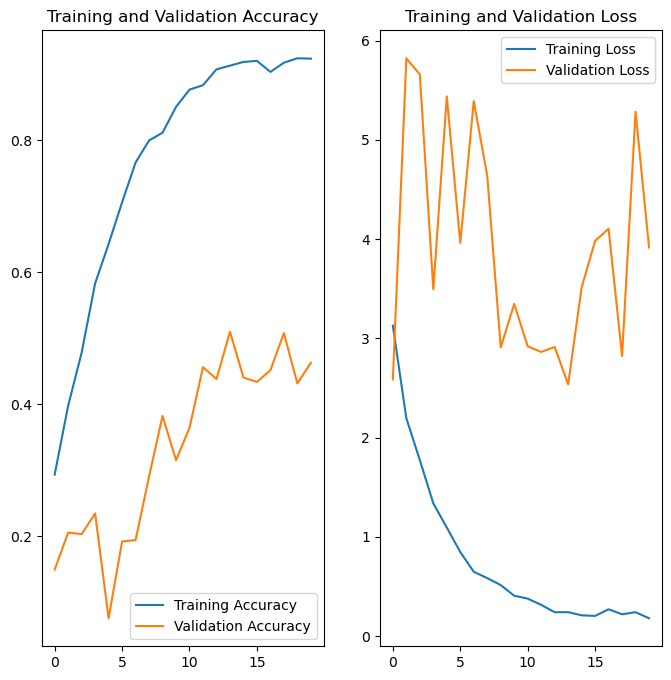

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Observation on Model 3

1. accuracy: 0.9273 - loss: 0.1694 - val_accuracy: 0.4631 - val_loss: 3.9157

The gap indicates clearly about overfitting and data stabilization

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [34]:
# train data in each folders
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Image(Train)","Total Percentage(Train)","Total Image(Test)","Total Percentage(Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Dir_Name":dir_name,"Total Image(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/image_count_train)*100,2)}
   data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame([df])], ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")
#display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

In [35]:
# test data in each folders

for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Total Image(Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Total Percentage(Test)"]  = round((total_image_in_folder/image_count_test)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))


,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.63,16,13.56
melanoma,438,19.56,16,13.56
basal cell carcinoma,376,16.79,16,13.56
nevus,357,15.94,16,13.56
squamous cell carcinoma,181,8.08,16,13.56
vascular lesion,139,6.21,3,2.54
actinic keratosis,114,5.09,16,13.56
dermatofibroma,95,4.24,16,13.56
seborrheic keratosis,77,3.44,3,2.54


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

Ans - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
Ans - pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
import os
import Augmentor

# Function to ensure output directory exists
def ensure_directory_exists(directory_path):
    if not os.path.exists(directory_path):
        try:
            os.makedirs(directory_path)
            print(f"Output directory created: {directory_path}")
        except OSError as e:
            print(f"Error creating directory {directory_path}: {str(e)}")
            return False
    return True

# Augmentation for each class
path_to_training_dataset = os.path.normpath(str(data_dir_train)) + '/'  # Normalize the path for compatibility
for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)  # Create full path for each class
    output_dir = os.path.join(class_path, "output")  # Output directory for augmented images

    # Ensure the output directory exists
    if not ensure_directory_exists(output_dir):
        print(f"Skipping augmentation for class: {class_name} due to directory creation error.")
        continue

    # Initialize Augmentor pipeline
    p = Augmentor.Pipeline(class_path, output_directory=output_dir, save_format="jpg")

    # Apply augmentation (e.g., rotation)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Perform augmentation and handle potential errors
    try:
        print(f"Starting augmentation for class: {class_name}")
        p.sample(500)  # Generate 500 augmented samples
        print(f"Augmentation complete for class: {class_name}")
    except FileNotFoundError as fnf_error:
        print(f"FileNotFoundError: {str(fnf_error)}. Please check the directory and file paths.")
    except Exception as e:
        print(f"Error during augmentation for class {class_name}: {str(e)}")


Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/actinic keratosis\output
Initialised with 114 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/actinic keratosis\output.Starting augmentation for class: actinic keratosis


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x17848AF9990>: 100%|██████████| 500/500 [00:05<00:00, 84.65 Samples/s] 


Augmentation complete for class: actinic keratosis
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/basal cell carcinoma\output
Initialised with 376 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/basal cell carcinoma\output.Starting augmentation for class: basal cell carcinoma


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1784757A810>: 100%|██████████| 500/500 [00:07<00:00, 67.19 Samples/s]                   


Augmentation complete for class: basal cell carcinoma
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/dermatofibroma\output
Initialised with 95 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/dermatofibroma\output.Starting augmentation for class: dermatofibroma


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17847574410>: 100%|██████████| 500/500 [00:08<00:00, 57.55 Samples/s]                  


Augmentation complete for class: dermatofibroma
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/melanoma\output
Initialised with 438 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/melanoma\output.Starting augmentation for class: melanoma


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x178475E8310>: 100%|██████████| 500/500 [00:29<00:00, 16.85 Samples/s] 


Augmentation complete for class: melanoma
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/nevus\output
Initialised with 357 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/nevus\output.Starting augmentation for class: nevus


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17848B00550>: 100%|██████████| 500/500 [00:30<00:00, 16.53 Samples/s]                    


Augmentation complete for class: nevus
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/pigmented benign keratosis\output
Initialised with 462 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/pigmented benign keratosis\output.Starting augmentation for class: pigmented benign keratosis


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17848B07290>: 100%|██████████| 500/500 [00:06<00:00, 78.09 Samples/s]                   


Augmentation complete for class: pigmented benign keratosis
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/seborrheic keratosis\output
Initialised with 77 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/seborrheic keratosis\output.Starting augmentation for class: seborrheic keratosis


Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x177EEFAFFD0>: 100%|██████████| 500/500 [00:15<00:00, 31.57 Samples/s]                  


Augmentation complete for class: seborrheic keratosis
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/squamous cell carcinoma\output
Initialised with 181 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/squamous cell carcinoma\output.Starting augmentation for class: squamous cell carcinoma


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x17848B34810>: 100%|██████████| 500/500 [00:08<00:00, 57.26 Samples/s]


Augmentation complete for class: squamous cell carcinoma
Output directory created: C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/vascular lesion\output
Initialised with 139 image(s) found.
Output directory set to C:\Users\s_vim\Downloads\AIML\MelonamaDetectionassignment_18Sep2024\CNN_Assignment\Train/vascular lesion\output.Starting augmentation for class: vascular lesion


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x177EE1B79D0>: 100%|██████████| 500/500 [00:09<00:00, 51.14 Samples/s]                   

Augmentation complete for class: vascular lesion


In [38]:
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
import os # imports the os module
from glob import glob # imports the glob function from the glob module

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\s_vim\\Downloads\\AIML\\MelonamaDetectionassignment_18Sep2024\\CNN_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5d070f80-21aa-469e-83b4-614fb19efef9.jpg',
 'C:\\Users\\s_vim\\Downloads\\AIML\\MelonamaDetectionassignment_18Sep2024\\CNN_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_cee18156-8e5a-4502-bdda-6e019445db19.jpg',
 'C:\\Users\\s_vim\\Downloads\\AIML\\MelonamaDetectionassignment_18Sep2024\\CNN_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_da5c0031-ab20-421a-ab2b-4ca9b095b5b4.jpg',
 'C:\\Users\\s_vim\\Downloads\\AIML\\MelonamaDetectionassignment_18Sep2024\\CNN_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f7cf459b-46e5-4d4a-a187-4fb010f4fd58.jpg',
 'C:\\Users\\s_vim\\Downloads\\AIML\\MelonamaDetectionassignment_18Sep2024\\CNN_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_orig

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [44]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
data_dir_train

WindowsPath('C:/Users/s_vim/Downloads/AIML/MelonamaDetectionassignment_18Sep2024/CNN_Assignment/Train')

#### **Todo:** Create a training dataset

In [47]:
data_dir_train="C:/Users/s_vim/Downloads/AIML/MelonamaDetectionassignment_18Sep2024/CNN_Assignment/Train"
# Re-initializing the train_ds and val_ds as new data augmentation was done.
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [48]:
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [49]:
print('Count of training batches: %d' % tf.data.experimental.cardinality(train_ds1).numpy())
print('Count of validation batches: %d' % tf.data.experimental.cardinality(val_ds1).numpy())

Count of training batches: 169
Count of validation batches: 43


#### **Todo:** Create your model (make sure to include normalization)


### Model 4 - After handling data imbalance.

In [50]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras import layers

# Building the model M4 after handling data imbalance, added 500 images to all categories

# num_classes = 9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)) ]) 
    
# Convolutional Layer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (9 classes)
model.add(layers.Dense(num_classes, activation='softmax'))


C:\Users\s_vim\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 89, 89, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,663,081 (6.34 MB)

 Trainable params: 1,662,857 (6.34 MB)

 Non-trainable params: 224 (896.00 B)

#### **Todo:**  Train your model

In [53]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - accuracy: 0.3271 - loss: 3.3221 - val_accuracy: 0.1403 - val_loss: 5.4927
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 46s 274ms/step - accuracy: 0.5482 - loss: 1.4998 - val_accuracy: 0.1767 - val_loss: 6.0867
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 277ms/step - accuracy: 0.6443 - loss: 1.0342 - val_accuracy: 0.2316 - val_loss: 4.0654
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.7393 - loss: 0.7520 - val_accuracy: 0.4284 - val_loss: 2.2113
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.7960 - loss: 0.5591 - val_accuracy: 0.5932 - val_loss: 1.4678
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 280ms/step - accuracy: 0.8405 - loss: 0.4407 - val_accuracy: 0.3831 - val_loss: 4.0752
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.8613 - loss: 0.3930 - val_accuracy: 0.6481 - val_loss: 1.3537
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - accuracy: 0.8968 - loss: 0

#### **Todo:**  Visualize the model results

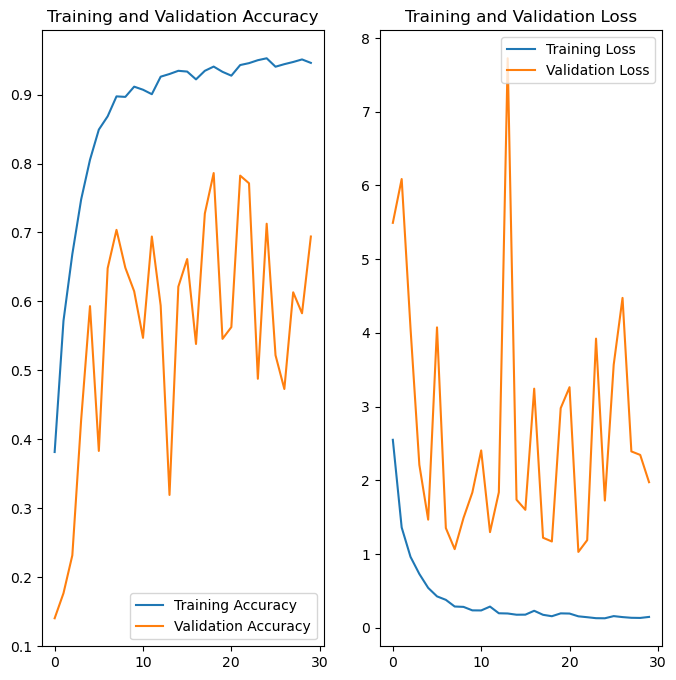

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Train Data Analysis

accuracy: 0.9413 - loss: 0.1651 - val_accuracy: 0.6941 - val_loss: 1.9756
**Inference**
The training accuracy is high (94.13%), but the validation accuracy is significantly lower (69.41%), and the validation loss is quite high (1.9756). This indicates overfitting, where the model performs well on the training data but poorly on unseen validation data.

**Reasons for overfitting**
1. Too Complex Model:
The model may have too many layers or filters, giving it excessive capacity to memorize the training data but not generalize to new data.
2. Insufficient Regularization:
Dropout, weight regularization (L2), or data augmentation might not be enough or could be missing, allowing the model to overfit.
Though we have handled data imbalance still the model overfits.

3. Small Training Data:
If your training dataset is small, the model can easily overfit by memorizing the small dataset rather than learning general patterns.

**Steps to address overfitting**
1. Increase Data Augmentation: Add more variations to the input data to help the model generalize better.
2. Reduce Model Complexity: Simplify the model by reducing the number of filters or layers.
3. Increase Dropout: Increase the dropout rate in fully connected layers to regularize the model and prevent overfitting:
4. L2 Regularization: Add L2 regularization to penalize large weights and encourage the model to find simpler solutions:
5. Early Stopping: Use early stopping to avoid overtraining. It can help you stop training when the validation loss starts increasing:
ex: early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

6. Reduce Learning Rate: A high learning rate might cause the model to "overfit" the data too quickly. Try reducing the learning rate:


In [55]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [56]:
# Evaluate model accuracy on test data

class_names = test_ds.class_names
print(class_names)

test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get probabilities for the test dataset
predictions = model.predict(test_ds)

# Convert probabilities to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print first 5 predicted classes
print(f'Predicted classes: {predicted_classes[:5]}')

# Print first 5 actual classes
print(f'Actual classes: {class_names[:5]}')

# Print the probability distribution for the first test sample
print(f'Probabilities for first test sample: {predictions[0]}')

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
4/4 - 6s - 2s/step - accuracy: 0.3644 - loss: 8.4024
Test accuracy: 36.44%
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
Predicted classes: [2 6 5 4 5]
Actual classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus']
Probabilities for first test sample: [1.2497320e-04 1.2712540e-02 9.8489308e-01 2.1635855e-03 2.0679895e-06
 2.4138073e-05 7.9451151e-05 1.3398724e-07 2.1061932e-09]


### Inference from test data
The model's accuracy on the test set is quite low (36.44%), and the loss is very high (8.4024), suggesting that the model is struggling to generalize to unseen data. Let's analyze this and consider some strategies to improve the performance.

**Key Observations:**
1. Overfitting: The validation accuracy is significantly lower than the training accuracy, indicating that the model is overfitting to the training data.
2. Class Imbalance: It’s possible that some classes in your dataset might have fewer examples than others, which can cause the model to be biased towards the majority classes.
3. High Loss & Poor Predictions: The model seems uncertain in its predictions, leading to a high loss despite reasonable accuracy on a small part of the data.

**Summary of Recommendations:**
1. Class Imbalance: Apply class weights or oversampling to handle potential class imbalance.
2. Data Augmentation: Improve and expand the range of data augmentations to make the model more robust.
3. Transfer Learning: Leverage a pretrained model like MobileNetV2 or ResNet50 to improve performance on small datasets.
4. Learning Rate Schedulers: Dynamically adjust the learning rate when performance plateaus.
5. Different Optimizers: Experiment with optimizers like RMSprop or SGD for better convergence.